In [1]:
#You may add additional imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
import math
%matplotlib inline

In [2]:
# Read the data from csv file
col_names = []
for i in range(33):
    if i == 0:
        col_names.append('State')
    if i == 1:
        col_names.append('Fips')
    if i == 2:
        col_names.append('County')
    if i == 3:
        col_names.append('Votes')
    if i == 4:
        col_names.append('Republicans 2016')
    if i == 5:
        col_names.append('Democrats 2016')
    if i == 6:
        col_names.append('Republicans 2012')
    if i == 7:
        col_names.append('Republicans 2008')
    if i == 8:
        col_names.append('Democrats 2012')
    if i == 9:
        col_names.append('Democrats 2008')
    if i == 10:
        col_names.append('Less Than High School Diploma')
    if i == 11:
        col_names.append('At Least High School Diploma')
    if i == 12:
        col_names.append('At Least Bachelors Degree')
    if i == 13:
        col_names.append('Graduate Degree')
    if i == 14:
        col_names.append('Median Earnings 2010')
    if i == 15:
        col_names.append('Total Population')
    if i == 16:
        col_names.append('Poverty Rate below federal poverty threshold')
    if i == 17:
        col_names.append('Management professional and related occupations')
    if i == 18:
        col_names.append('Service occupations')
    if i == 19:
        col_names.append('Sales and office occupations')
    if i == 20:
        col_names.append('Farming fishing and forestry occupations')
    if i == 21:
        col_names.append('Construction extraction maintenance and repair occupations')
    if i == 22:
        col_names.append('Production transportation and material moving occupations')
    if i == 23:
        col_names.append('White')
    if i == 24:
        col_names.append('Black')
    if i == 25:
        col_names.append('Hispanic')
    if i == 26:
        col_names.append('Asian')
    if i == 27:
        col_names.append('Amerindian')
    if i == 28:
        col_names.append('Other Race')
    if i == 29:
        col_names.append('Median Age')
    if i == 30:
        col_names.append('Uninsured')
    if i == 31:
        col_names.append('Unemployment')
    if i == 32:
        col_names.append('Violent crime')
        
data = pd.read_csv("2016_election_dataset.csv", names = col_names, index_col=False)
print(data.shape)
data.head(10)

(3114, 33)


,State,Fips,County,Votes,Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,...,White,Black,Hispanic,Asian,Amerindian,Other Race,Median Age,Uninsured,Unemployment,Violent crime
0,MN,27017,"Carlton County, Minnesota",18059.0,45.185226,46.846448,35.723584,35.497859,61.775873,62.339422,...,89.50,1.35,1.40,0.55,5.40,1.90,40.1,0.112,0.071,124.41
1,KS,20127,"Morris County, Kansas",2568.0,69.704050,22.819315,69.203747,65.997888,28.024980,31.925378,...,94.20,0.20,3.65,0.55,0.60,0.80,45.9,0.148,0.066,178.58
2,OK,40107,"Okfuskee County, Oklahoma",3933.0,70.963641,23.976608,65.023670,64.103808,34.976330,35.896192,...,64.00,9.05,2.60,0.05,15.95,8.25,40.3,0.246,0.072,246.62
3,MT,30085,"Roosevelt County, Montana",3502.0,49.171902,42.946887,41.230937,35.468336,56.808279,61.738502,...,36.00,0.05,1.10,0.40,53.55,8.90,32.0,0.264,0.074,314.33
4,NY,36055,"Monroe County, New York",320164.0,40.251559,54.366824,39.951110,40.474828,57.966886,58.180987,...,74.25,14.10,6.60,3.00,0.20,1.80,38.1,0.101,0.080,363.42
5,VA,51117,"Mecklenburg County, Virginia",15177.0,54.576003,43.295777,52.881873,51.829996,45.904358,47.255006,...,58.95,36.95,2.30,0.65,0.10,1.05,45.1,0.187,0.098,193.67
6,GA,13143,"Haralson County, Georgia",11317.0,84.642573,13.024653,81.399383,78.021087,17.241712,20.257727,...,91.50,4.95,1.15,0.35,0.30,1.80,38.0,0.204,0.095,522.03
7,ME,23017,"Oxford County, Maine",31094.0,52.145108,39.145816,40.774983,40.641390,55.506458,56.682464,...,96.55,0.40,0.95,0.50,0.40,1.25,43.6,0.138,0.091,119.42
8,KY,21123,"Larue County, Kentucky",6367.0,75.373017,20.072248,67.852186,67.222402,30.065926,30.964714,...,92.85,3.45,2.15,0.15,0.35,1.10,39.1,0.185,0.075,47.32
9,NC,37021,"Buncombe County, North Carolina",134507.0,41.142097,55.712342,42.836894,42.403974,55.307136,56.315683,...,85.20,6.60,5.10,1.00,0.30,1.80,40.6,0.201,0.075,259.20


In [3]:
#Republican is 0, Democrat is 1
def label_party (row):
    if row['Republicans 2016'] > row['Democrats 2016']:
        return 0
    if row['Republicans 2016'] < row['Democrats 2016']:
        return 1
    if row['Republicans 2016'] == row['Democrats 2016']:
        return None
    
def convertToNumber (s):
    return int.from_bytes(s.encode(), 'little')

# add label
data['Party Label'] = data.apply (lambda row: label_party(row), axis=1)

states = {
        'AK': 1,'AL': 2,'AR': 3,'AS': 4,'AZ': 5,'CA': 6,'CO': 7,'CT': 8,'DC': 9,'DE': 10,'FL': 11,'GA': 12,'GU': 13,'HI': 14,
        'IA': 15,'ID': 16,'IL': 17,'IN': 18,'KS': 19,'KY': 20,'LA': 21,'MA': 22,'MD': 23,'ME': 24,'MI': 25,'MN': 26,'MO': 27,
        'MP': 28,'MS': 29,'MT': 30,'NA': 31,'NC': 32,'ND': 33,'NE': 34,'NH': 35,'NJ': 36,'NM': 37,'NV': 38,'NY': 39,'OH': 40,
        'OK': 41,'OR': 42,'PA': 43,'PR': 44,'RI': 45,'SC': 46,'SD': 47,'TN': 48,'TX': 49,'UT': 50,'VA': 51,'VI': 52, 'VT': 53,
        'WA': 54,'WI': 55,'WV': 56,'WY': 57
}
data['State']=data['State'].map(states)

data = data.drop('County', axis=1)
data = data.drop('Republicans 2016', axis=1)
data = data.drop('Democrats 2016', axis=1)

#just some test, accuracy drops to 89%, so not much really.
# data = data.drop('Republicans 2012', axis=1)
# data = data.drop('Democrats 2012', axis=1)
# data = data.drop('Republicans 2008', axis=1)
# data = data.drop('Democrats 2008', axis=1)

data = data.dropna()

data.head(10)

,State,Fips,Votes,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors Degree,...,Black,Hispanic,Asian,Amerindian,Other Race,Median Age,Uninsured,Unemployment,Violent crime,Party Label
0,26.0,27017,18059.0,35.723584,35.497859,61.775873,62.339422,9.7,90.3,21.4,...,1.35,1.40,0.55,5.40,1.90,40.1,0.112,0.071,124.41,1.0
1,19.0,20127,2568.0,69.203747,65.997888,28.024980,31.925378,9.9,90.1,16.6,...,0.20,3.65,0.55,0.60,0.80,45.9,0.148,0.066,178.58,0.0
2,41.0,40107,3933.0,65.023670,64.103808,34.976330,35.896192,21.2,78.8,10.9,...,9.05,2.60,0.05,15.95,8.25,40.3,0.246,0.072,246.62,0.0
3,30.0,30085,3502.0,41.230937,35.468336,56.808279,61.738502,10.9,89.1,17.3,...,0.05,1.10,0.40,53.55,8.90,32.0,0.264,0.074,314.33,0.0
4,39.0,36055,320164.0,39.951110,40.474828,57.966886,58.180987,11.6,88.4,34.8,...,14.10,6.60,3.00,0.20,1.80,38.1,0.101,0.080,363.42,1.0
5,51.0,51117,15177.0,52.881873,51.829996,45.904358,47.255006,24.8,75.2,13.4,...,36.95,2.30,0.65,0.10,1.05,45.1,0.187,0.098,193.67,0.0
6,12.0,13143,11317.0,81.399383,78.021087,17.241712,20.257727,30.4,69.6,11.0,...,4.95,1.15,0.35,0.30,1.80,38.0,0.204,0.095,522.03,0.0
7,24.0,23017,31094.0,40.774983,40.641390,55.506458,56.682464,12.5,87.5,18.5,...,0.40,0.95,0.50,0.40,1.25,43.6,0.138,0.091,119.42,0.0
8,20.0,21123,6367.0,67.852186,67.222402,30.065926,30.964714,23.2,76.8,12.1,...,3.45,2.15,0.15,0.35,1.10,39.1,0.185,0.075,47.32,0.0
9,32.0,37021,134507.0,42.836894,42.403974,55.307136,56.315683,12.8,87.2,31.2,...,6.60,5.10,1.00,0.30,1.80,40.6,0.201,0.075,259.20,1.0


In [4]:
labels = data['Party Label']
features = data.drop(['Party Label'], axis=1)

print("Features shape: " + str(features.shape))
print("Labels shape: " + str(labels.shape))
features.head()

Features shape: (2944, 30)
Labels shape: (2944,)


,State,Fips,Votes,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors Degree,...,White,Black,Hispanic,Asian,Amerindian,Other Race,Median Age,Uninsured,Unemployment,Violent crime
0,26.0,27017,18059.0,35.723584,35.497859,61.775873,62.339422,9.7,90.3,21.4,...,89.50,1.35,1.40,0.55,5.40,1.90,40.1,0.112,0.071,124.41
1,19.0,20127,2568.0,69.203747,65.997888,28.024980,31.925378,9.9,90.1,16.6,...,94.20,0.20,3.65,0.55,0.60,0.80,45.9,0.148,0.066,178.58
2,41.0,40107,3933.0,65.023670,64.103808,34.976330,35.896192,21.2,78.8,10.9,...,64.00,9.05,2.60,0.05,15.95,8.25,40.3,0.246,0.072,246.62
3,30.0,30085,3502.0,41.230937,35.468336,56.808279,61.738502,10.9,89.1,17.3,...,36.00,0.05,1.10,0.40,53.55,8.90,32.0,0.264,0.074,314.33
4,39.0,36055,320164.0,39.951110,40.474828,57.966886,58.180987,11.6,88.4,34.8,...,74.25,14.10,6.60,3.00,0.20,1.80,38.1,0.101,0.080,363.42


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
clf = GaussianNB()
clf.fit(features, labels)

nested_score = cross_val_score(clf, features, labels, cv=10)
print("Accuracy:", nested_score.mean()*100)

Accuracy: 94.29282119511771


In [6]:
# your code goes here
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted_score = cross_val_predict(clf, features, labels, cv = 10)
print(confusion_matrix(labels, predicted_score))
print()
print(classification_report(labels, predicted_score))

[[2411   66]
 [ 102  365]]

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      2477
         1.0       0.85      0.78      0.81       467

    accuracy                           0.94      2944
   macro avg       0.90      0.88      0.89      2944
weighted avg       0.94      0.94      0.94      2944



0.9871112237998648


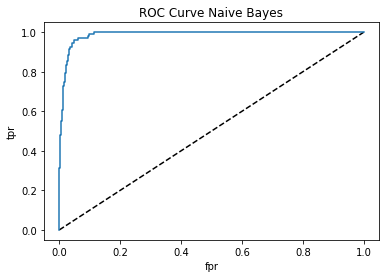

In [7]:
# your code goes here
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20)

clf = GaussianNB()
clf.fit(features_train, labels_train)

proba = clf.predict_proba(features_test)
fpr_result, tpr_result, thresholds = roc_curve(labels_test, proba[:,1])
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr = fpr_result, tpr_result

print(roc_auc_score(labels_test, proba[:,1]))

# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

This next part is with the features we modified and added. 

In [8]:
def voter_turnout (row):
    return (row['Votes'] / row['Total Population']) * 100

def minority(row):
    return (row['Black'] + row['Hispanic'] + row['Asian'] + row['Amerindian'] + row['Other Race'])

def professional(row):
    return (row['Management professional and related occupations'] + row['Sales and office occupations'])
    
def manufacturing(row):
    return (row['Farming fishing and forestry occupations'] + row['Construction extraction maintenance and repair occupations'] + row['Production transportation and material moving occupations'])
    
data1 = data.pop('Party Label')    
    
data['Voter Turnout'] = data.apply (lambda row: voter_turnout(row), axis=1)
data['Minority'] = data.apply (lambda row: minority(row), axis=1)
data['Professional'] = data.apply (lambda row: professional(row), axis=1)
data['Manufacturing'] = data.apply (lambda row: manufacturing(row), axis=1)

data = data.drop('Black', axis=1)
data = data.drop('Hispanic', axis=1)
data = data.drop('Asian', axis=1)
data = data.drop('Amerindian', axis=1)
data = data.drop('Other Race', axis=1)
data = data.drop('Management professional and related occupations', axis=1)
data = data.drop('Sales and office occupations', axis=1)
data = data.drop('Farming fishing and forestry occupations', axis=1)
data = data.drop('Construction extraction maintenance and repair occupations', axis=1)
data = data.drop('Production transportation and material moving occupations', axis=1)

data['Party Label'] = data1

data.head(10)

,State,Fips,Votes,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors Degree,...,White,Median Age,Uninsured,Unemployment,Violent crime,Voter Turnout,Minority,Professional,Manufacturing,Party Label
0,26.0,27017,18059.0,35.723584,35.497859,61.775873,62.339422,9.7,90.3,21.4,...,89.50,40.1,0.112,0.071,124.41,52.148426,10.60,53.40,26.00,1.0
1,19.0,20127,2568.0,69.203747,65.997888,28.024980,31.925378,9.9,90.1,16.6,...,94.20,45.9,0.148,0.066,178.58,43.203230,5.80,49.35,37.75,0.0
2,41.0,40107,3933.0,65.023670,64.103808,34.976330,35.896192,21.2,78.8,10.9,...,64.00,40.3,0.246,0.072,246.62,33.724919,35.90,50.30,28.55,0.0
3,30.0,30085,3502.0,41.230937,35.468336,56.808279,61.738502,10.9,89.1,17.3,...,36.00,32.0,0.264,0.074,314.33,33.907823,64.00,59.50,18.75,0.0
4,39.0,36055,320164.0,39.951110,40.474828,57.966886,58.180987,11.6,88.4,34.8,...,74.25,38.1,0.101,0.080,363.42,43.383714,25.70,66.50,17.35,1.0
5,51.0,51117,15177.0,52.881873,51.829996,45.904358,47.255006,24.8,75.2,13.4,...,58.95,45.1,0.187,0.098,193.67,46.904843,41.05,52.45,30.75,0.0
6,12.0,13143,11317.0,81.399383,78.021087,17.241712,20.257727,30.4,69.6,11.0,...,91.50,38.0,0.204,0.095,522.03,39.474694,8.55,49.50,35.30,0.0
7,24.0,23017,31094.0,40.774983,40.641390,55.506458,56.682464,12.5,87.5,18.5,...,96.55,43.6,0.138,0.091,119.42,54.433416,3.50,47.20,32.80,0.0
8,20.0,21123,6367.0,67.852186,67.222402,30.065926,30.964714,23.2,76.8,12.1,...,92.85,39.1,0.185,0.075,47.32,45.851937,7.20,45.35,40.80,0.0
9,32.0,37021,134507.0,42.836894,42.403974,55.307136,56.315683,12.8,87.2,31.2,...,85.20,40.6,0.201,0.075,259.20,57.953924,14.80,59.75,21.75,1.0


In [9]:
labels = data['Party Label']
features = data.drop(['Party Label'], axis=1)

print("Features shape: " + str(features.shape))
print("Labels shape: " + str(labels.shape))
features.head()

Features shape: (2944, 24)
Labels shape: (2944,)


,State,Fips,Votes,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors Degree,...,Service occupations,White,Median Age,Uninsured,Unemployment,Violent crime,Voter Turnout,Minority,Professional,Manufacturing
0,26.0,27017,18059.0,35.723584,35.497859,61.775873,62.339422,9.7,90.3,21.4,...,20.55,89.50,40.1,0.112,0.071,124.41,52.148426,10.6,53.40,26.00
1,19.0,20127,2568.0,69.203747,65.997888,28.024980,31.925378,9.9,90.1,16.6,...,12.95,94.20,45.9,0.148,0.066,178.58,43.203230,5.8,49.35,37.75
2,41.0,40107,3933.0,65.023670,64.103808,34.976330,35.896192,21.2,78.8,10.9,...,21.15,64.00,40.3,0.246,0.072,246.62,33.724919,35.9,50.30,28.55
3,30.0,30085,3502.0,41.230937,35.468336,56.808279,61.738502,10.9,89.1,17.3,...,21.75,36.00,32.0,0.264,0.074,314.33,33.907823,64.0,59.50,18.75
4,39.0,36055,320164.0,39.951110,40.474828,57.966886,58.180987,11.6,88.4,34.8,...,16.15,74.25,38.1,0.101,0.080,363.42,43.383714,25.7,66.50,17.35


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
clf = GaussianNB()
clf.fit(features, labels)

nested_score = cross_val_score(clf, features, labels, cv=10)
print("Accuracy:", nested_score.mean()*100)

Accuracy: 94.32695088795046


In [11]:
# your code goes here
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted_score = cross_val_predict(clf, features, labels, cv = 10)
print(confusion_matrix(labels, predicted_score))
print()
print(classification_report(labels, predicted_score))

[[2403   74]
 [  93  374]]

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      2477
         1.0       0.83      0.80      0.82       467

    accuracy                           0.94      2944
   macro avg       0.90      0.89      0.89      2944
weighted avg       0.94      0.94      0.94      2944



0.9883238716431131


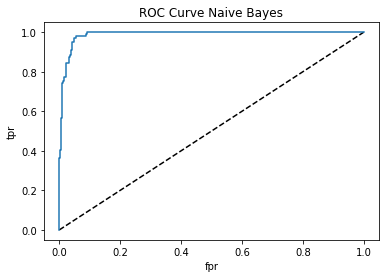

In [12]:
# your code goes here
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20)

clf = GaussianNB()
clf.fit(features_train, labels_train)

proba = clf.predict_proba(features_test)
fpr_result, tpr_result, thresholds = roc_curve(labels_test, proba[:,1])
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr = fpr_result, tpr_result

print(roc_auc_score(labels_test, proba[:,1]))

# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()